Project 3: TimeSeries Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from datetime import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\DATA\data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
'''
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY
'''

'\n1. NASDAQ.AAPL\n2. NASDAQ.ADP\n3. NASDAQ.CBOE\n4. NASDAQ.CSCO\n5. NASDAQ.EBAY\n'

1. NASDAQ.AAPL

In [5]:
# Taking log of the column
df['log_AAPL']=np.log(df['NASDAQ.AAPL'])

In [6]:
# import datetime for date time conversion
from datetime import datetime
# datetime conversion and created a new column NDATE
df['NDATE']=pd.to_datetime(df['DATE'],unit='s')

df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,log_AAPL,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


In [7]:
# df['new']=df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")
#Durbin_watson test is used to check the presence of Autocorrelation in residuals in regression analysis. 
#The Durbin-Watson statistic is always between 0 and 4. 
#A value of 2 means that there is no autocorrelation in the sample.  
#Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.

import statsmodels.api as sm 
sm.stats.durbin_watson(df['log_AAPL'])

1.5195875753588083e-08

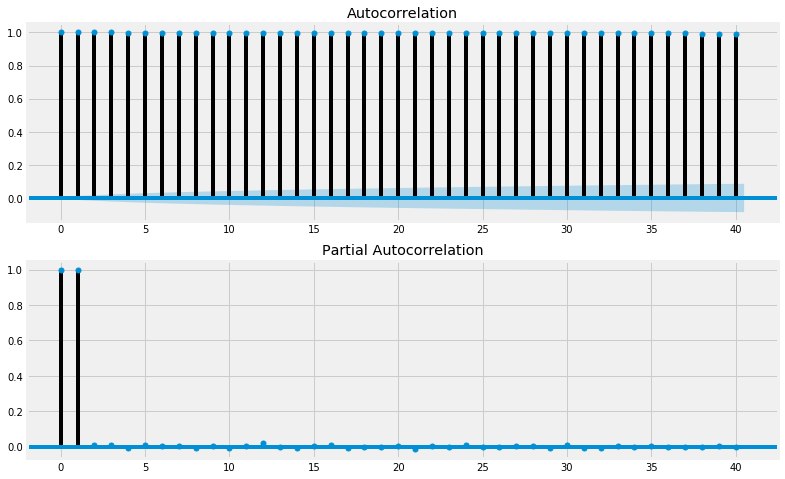

In [8]:
%matplotlib inline 
fig = plt.figure(figsize=(12,8))
# for Auto-correlation plot 
ax1 = fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_acf(df['log_AAPL'].values.squeeze(), lags=40, ax=ax1) 
#for partial Auto-correlation plot 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(df['log_AAPL'], lags=40, ax=ax2)

In [9]:
# convert pandas column into matrix to use in ARIMA model
AAPL_array=df["log_AAPL"].dropna().values

In [10]:
AAPL_array

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [11]:
# residuals 
df['diff_log_AAPL']= df["log_AAPL"]-df["log_AAPL"].shift(periods=-1) 

In [12]:
#Building model 
model_AAPL = ARIMA(AAPL_array, (2,2,1)).fit()

In [13]:
# prediction 
predAAPL=model_AAPL.predict()
predAAPL

array([-1.46943997e-09,  1.03529273e-04,  2.60540732e-04, ...,
       -5.64259112e-05,  6.63262054e-04,  7.82788321e-04])

In [14]:
# Printing parameters AIC,BIC,HQIC
print(model_AAPL.aic,model_AAPL.bic,model_AAPL.hqic)

-492060.6927971313 -492017.5540684907 -492047.05811610236


In [15]:
best_values = [0,0,0]
best_values

[0, 0, 0]

In [16]:
len(predAAPL)

41264

In [17]:
best_aic = 1e20
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model = ARIMA(AAPL_array,(p,d,q)).fit()
                if model.aic <best_aic:
                    best_values = [p,d,q]
except:
    pass
print(best_values)

[0, 2, 1]


In [18]:
# fitting the model with best_values
model_AAPL_best = ARIMA(AAPL_array, (0,2,1)).fit()

In [19]:
AAPL_pred = model_AAPL_best.predict()
AAPL_pred

array([-3.71629800e-09,  1.04036568e-04,  2.55908308e-04, ...,
       -5.30880505e-05,  6.77497917e-04,  7.99022754e-04])

In [20]:
len(AAPL_pred)

41264

In [21]:
# calculating the mean_squared_error metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df['log_AAPL'][2:],AAPL_pred))

25.12993135100613


2.NASDAQ.ADP

In [22]:
ADP=df['NASDAQ.ADP']

In [23]:
ADP.dtype

dtype('float64')

In [24]:
# convert pandas column into matrix to use in ARIMA model
ADP_array=df["NASDAQ.ADP"].dropna().values

In [25]:
# residuals 
df['diff_log_ADP']= df["NASDAQ.ADP"]-df["NASDAQ.ADP"].shift(periods=-1) 

In [26]:
#Building model 
model_ADP = ARIMA(ADP_array, (0,2,1)).fit()

In [27]:
# prediction 
predADP=model_ADP.predict()
predADP

array([ 8.60645091e-08, -8.12484844e-02,  4.24998877e-02, ...,
       -2.43106966e-02,  7.02776193e-02,  1.19577080e-01])

In [28]:
print(model_ADP.aic,model_ADP.bic,model_ADP.hqic)

-97294.91409429793 -97269.03085711357 -97286.73328568056


In [29]:
len(predADP)

41264

In [30]:
rmse_adp = np.sqrt(mean_squared_error(df['diff_log_ADP'][1:-1],predADP))
rmse_adp

0.10185272960984508

In [31]:
np.exp(rmse_adp)

1.107220398940192

3.NASDAQ.CBOE

In [32]:
#log transformation 
df['log_CBoE']=np.log(df['NASDAQ.CBOE']) 

In [33]:
# creating matrix 
CBoE_array=df["log_CBoE"].dropna().values

In [34]:
# residuals 
df['diff_log_CBoE']= df["log_CBoE"]-df["log_CBoE"].shift(periods=-1) 

In [35]:
#Building model 
model_CBoE = ARIMA(CBoE_array, (2,2,1)).fit()

In [36]:
# prediction 
predCBoE=model_CBoE.predict()
predCBoE

array([4.00513359e-10, 1.14952421e-03, 1.50201890e-03, ...,
       1.12907275e-04, 2.21761199e-04, 3.30377139e-04])

In [37]:
print(model_CBoE.aic,model_CBoE.bic)

-506313.8443954519 -506270.70566681126


In [38]:
rmse_CBoE = np.sqrt(mean_squared_error(df['diff_log_CBoE'][1:-1],predCBoE))
rmse_CBoE

0.0007971976394259053

In [39]:
np.exp(rmse_CBoE)

1.0007975154859206

4. NASDAQ.CSCO

In [40]:
from sklearn.metrics import mean_squared_error 
df['CSCO_log']=np.log(df['NASDAQ.CSCO']) 
CSCO_array=df['CSCO_log'].dropna().values 
df['diff_CSCO_log']= df['CSCO_log']-df["CSCO_log"].shift(periods=-1) 
#Here periods=-1 is used beacuse current row is subtracted from next row  
model_CSCO = ARIMA(CSCO_array, (2,2,1)).fit() 
df['diff_CSCO_log'].shape

(41266,)

In [41]:
rmse=np.sqrt(mean_squared_error(df['diff_CSCO_log'][1:-1],model_CSCO.predict()))
rmse

0.0009163582680661427

In [42]:
# predictions
predCSCO = model_CSCO.predict()
predCSCO

array([-6.59074101e-10,  1.69687255e-03,  2.54435476e-03, ...,
       -5.11271195e-04, -5.14916774e-05,  1.12670053e-04])

In [43]:
model_CSCO.aic

-486449.6977627952

In [44]:
np.exp(rmse)

1.0009167782525794

5. NASDAQ.EBAY

In [46]:
df['log_EBAY']=np.log(df['NASDAQ.EBAY'])

In [47]:
Ebay_array=df["log_EBAY"].dropna().values

In [48]:
df['diff_log_EBAY']= df["log_EBAY"]-df["log_EBAY"].shift(periods=-1)

In [49]:
model_Ebay = ARIMA(Ebay_array, (2,2,1)).fit()

In [50]:
predEbay=model_Ebay.predict()
predEbay

array([-5.99007233e-09, -2.74943393e-04,  1.72063582e-03, ...,
        1.03520129e-04, -4.10329287e-05,  2.43219258e-04])

In [51]:
print(model_Ebay.aic,model_Ebay.bic)

-486004.33842856827 -485961.19969992765


In [52]:
rmse_ebay=np.sqrt(mean_squared_error(df['diff_log_EBAY'][1:-1],predEbay))
rmse_ebay

0.0009745452721053531

In [53]:
np.exp(rmse_ebay)

1.000975020295647